#  Buoi 10 | 22/05/2021 | Logistic

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/drive/1fpztDYBcJmRVsTEKY6RhnSVqZ6LUoxJA?usp=sharing)

## Import các thư viện cần thiết

In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
import matplotlib.pyplot as plt


from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import scale

## Nonlib

In [21]:
data = pd.read_csv('/content/drive/MyDrive/TÀI LIỆU HỌC TẬP ĐẠI HỌC 2019-2023/PYTHON & ML 02/BUỔI 10 22 05 2021/Social_Network_Ads.csv')
print(data)

      User ID  Gender  Age  EstimatedSalary  Purchased
0    15624510    Male   19            19000          0
1    15810944    Male   35            20000          0
2    15668575  Female   26            43000          0
3    15603246  Female   27            57000          0
4    15804002    Male   19            76000          0
..        ...     ...  ...              ...        ...
395  15691863  Female   46            41000          1
396  15706071    Male   51            23000          1
397  15654296  Female   50            20000          1
398  15755018    Male   36            33000          0
399  15594041  Female   49            36000          1

[400 rows x 5 columns]


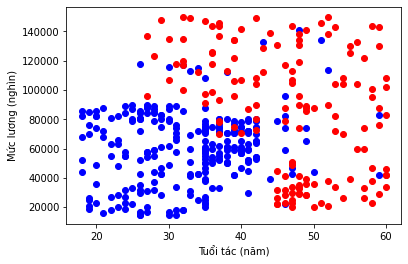

In [22]:
X1 = data.loc[data['Purchased'] == 1]
X0 = data.loc[data['Purchased'] == 0]
x1 = X1.iloc[:, [2,3]].values
x0 = X0.iloc[:, [2,3]].values
# Hiển thị dữ liệu lên biểu đồ
plt.scatter(x0[:,0],x0[:,1],c='blue')
plt.scatter(x1[:,0],x1[:,1],c='red')
plt.xlabel('Tuổi tác (năm)')
plt.ylabel('Mức lương (nghìn)')
plt.show()

In [23]:
#Scale dữ liệu
X = (data.iloc[:,[2,3]].values).astype('float64')
y = data.iloc[:, [4]].values

for i in range(0, len(X)):
  X[i][0] = X[i][0]/60
  X[i][1] = X[i][1]/150000
print(X)

[[0.31666667 0.12666667]
 [0.58333333 0.13333333]
 [0.43333333 0.28666667]
 [0.45       0.38      ]
 [0.31666667 0.50666667]
 [0.45       0.38666667]
 [0.45       0.56      ]
 [0.53333333 1.        ]
 [0.41666667 0.22      ]
 [0.58333333 0.43333333]
 [0.43333333 0.53333333]
 [0.43333333 0.34666667]
 [0.33333333 0.57333333]
 [0.53333333 0.12      ]
 [0.3        0.54666667]
 [0.48333333 0.53333333]
 [0.78333333 0.16666667]
 [0.75       0.17333333]
 [0.76666667 0.18666667]
 [0.8        0.19333333]
 [0.75       0.14666667]
 [0.78333333 0.32666667]
 [0.8        0.27333333]
 [0.75       0.14666667]
 [0.76666667 0.15333333]
 [0.78333333 0.13333333]
 [0.81666667 0.18666667]
 [0.78333333 0.2       ]
 [0.48333333 0.28666667]
 [0.51666667 0.12      ]
 [0.51666667 0.49333333]
 [0.45       0.91333333]
 [0.35       0.10666667]
 [0.46666667 0.29333333]
 [0.45       0.6       ]
 [0.58333333 0.18      ]
 [0.55       0.18666667]
 [0.5        0.32666667]
 [0.43333333 0.48      ]
 [0.45       0.20666667]


In [24]:
# Hàm sigmoid
def sigmoid(x):
    return 1 / (1 + np.exp(-x))
# Thêm cột 1 vào
ones = np.ones((len(X),1))
x = np.concatenate((ones,X), axis = 1)
w = np.array([0.,0.1,0.1]).reshape(-1,1)
print(x)
print('---------')

[[1.         0.31666667 0.12666667]
 [1.         0.58333333 0.13333333]
 [1.         0.43333333 0.28666667]
 ...
 [1.         0.83333333 0.13333333]
 [1.         0.6        0.22      ]
 [1.         0.81666667 0.24      ]]
---------


Sai số khởi điểm: [280.47171306]
Sai số cuối cùng: [138.58931087]
------------
Trọng số cuối cùng: 
[[-11.98054149]
 [ 13.47456173]
 [  5.19527239]]
Lost function: 


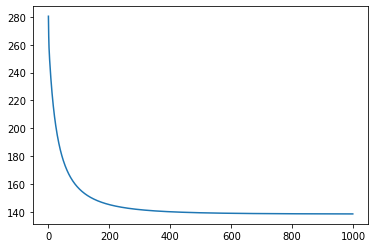

In [25]:
#Lặp
numOfIteration = 1000
cost = np.zeros((numOfIteration,1))
learning_rate = 0.01
numloop = []
for i in range(0, numOfIteration):
	  # Tính giá trị dự đoán
    y_predict = sigmoid(np.dot(x, w))
    cost[i] = -np.sum(np.multiply(y, np.log(y_predict)) + np.multiply(1-y, np.log(1-y_predict)))
    # Gradient descent
    w = w - learning_rate * np.dot(x.T, y_predict-y)
    numloop.append(i)
numloop = np.array(numloop)
#Sai số	khởi đầu
print('Sai số khởi điểm: ' + str(cost[0]))
#Sai số cuối cùng
print('Sai số cuối cùng: ' + str(cost[999]))
print('------------')
#Trọng số cuối cùng
print('Trọng số cuối cùng: ')
print(w)
print("Lost function: ")
plt.plot(numloop,cost)
plt.show()

In [26]:
# Độ chính xác
a = 0.00
for i in range(0, len(y_predict)):
  if y_predict[i] < 0.5:
    y_predict[i] = 0
  else:
    y_predict[i] = 1
  if y_predict[i] == y[i]:
    a += 1
print('Chính xác: ' + str((a/len(y))*100) + '%')

Chính xác: 84.25%


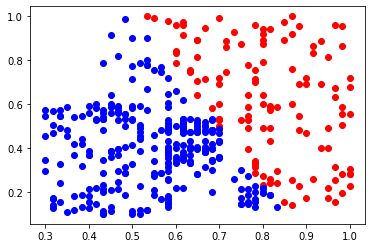

In [27]:
# Hiển thị dữ liệu sau khi phân chia
a1 = []
a0 = []
for i in range(0, len(y_predict)):
  if y_predict[i] == 1:
    a1.append(X[i])
  else:
    a0.append(X[i])
z1 = np.array(a1)
z0 = np.array(a0)
plt.scatter(z1[:,0],z1[:,1],c='red')
plt.scatter(z0[:,0],z0[:,1],c='blue')
plt.show()

Lương: 80000.0(nghìn đô)
Tuổi tác: 40.0(tuổi)
[[0.44356935]]
=> Kết quả: Không mua


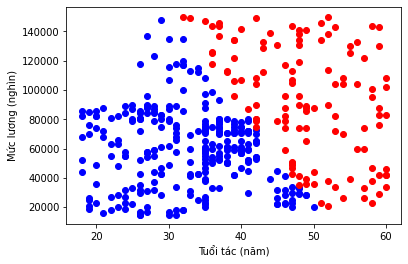

In [28]:
# Nhập dữ liệu cần dự đoán [[tuổi tác, lương]]
input = [[40.00 , 80000.00]]
need_pre = np.array(input)
print('Lương: ' + str(need_pre[0,1]) + '(nghìn đô)')
print('Tuổi tác: ' + str(need_pre[0,0]) + '(tuổi)')
need_pre[0,0] /= 60
need_pre[0,1] /= 150000
#Dự đoán
ones = np.ones((len(need_pre),1))
need_pre = np.concatenate((ones,need_pre), axis = 1)
result = sigmoid(np.dot(need_pre, w))
print(result)
if result >= 0.5:
  print('=> Kết quả: Mua')
else:
  print('=> Kết quả: Không mua')
# Đối chiếu biểu đồ
plt.scatter(z0[:,0]*60,z0[:,1]*150000,c='blue')
plt.scatter(z1[:,0]*60,z1[:,1]*150000,c='red')
plt.xlabel('Tuổi tác (năm)')
plt.ylabel('Mức lương (nghìn)')
plt.show()

In [29]:
accuracy_score(y,y_predict)

0.8425

## Lib

In [30]:
data = pd.read_csv('/content/drive/MyDrive/TÀI LIỆU HỌC TẬP ĐẠI HỌC 2019-2023/PYTHON & ML 02/BUỔI 10 22 05 2021/Social_Network_Ads.csv')
print(data)

      User ID  Gender  Age  EstimatedSalary  Purchased
0    15624510    Male   19            19000          0
1    15810944    Male   35            20000          0
2    15668575  Female   26            43000          0
3    15603246  Female   27            57000          0
4    15804002    Male   19            76000          0
..        ...     ...  ...              ...        ...
395  15691863  Female   46            41000          1
396  15706071    Male   51            23000          1
397  15654296  Female   50            20000          1
398  15755018    Male   36            33000          0
399  15594041  Female   49            36000          1

[400 rows x 5 columns]


In [31]:
X_train= data[['Age','EstimatedSalary']].tail(300).values
y_train = data['Purchased'].tail(300).values
X_test= data[['Age','EstimatedSalary']].head(100).values
y_test = data['Purchased'].head(100).values
x_train = scale(X_train)
x_test = scale(X_test)
print(x_train)
print('-------------')

[[-1.31393554  0.42383696]
 [-1.21378801 -0.44500883]
 [-0.81319791  0.36391656]
 [-0.71305038  2.25140914]
 [-2.11511575 -1.58349642]
 [-1.91482069 -0.05552624]
 [-1.41408306 -1.16405363]
 [-1.31393554  0.45379716]
 [-1.41408306  0.36391656]
 [-0.21231275  0.18415536]
 [-0.11216523 -0.08548644]
 [-0.31246028 -0.08548644]
 [-0.21231275 -0.38508843]
 [-0.31246028 -0.56484963]
 [ 0.18827735  0.18415536]
 [-0.0120177  -0.50492923]
 [-0.51275533  0.03435436]
 [-0.41260781 -0.65473023]
 [-0.0120177  -0.44500883]
 [ 0.08812982 -0.44500883]
 [-0.41260781  0.03435436]
 [-0.31246028 -0.05552624]
 [-0.0120177   0.03435436]
 [-0.51275533 -0.62477003]
 [ 0.08812982 -0.68469043]
 [-0.11216523 -0.38508843]
 [ 0.18827735 -0.26524764]
 [-1.41408306 -1.25393423]
 [-1.01349296 -1.70333722]
 [-1.41408306  0.30399616]
 [-0.91334544 -0.47496903]
 [-0.71305038 -1.28389443]
 [-1.01349296  0.39387676]
 [-1.91482069 -0.17536704]
 [-1.21378801 -0.56484963]
 [-1.71452564 -0.32516803]
 [-2.01496822  0.24407576]
 

In [32]:
model = LogisticRegression()
model.fit(x_train,y_train)
y_predict = model.predict(x_test)
print(y_predict)
#print(y_test)

[0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 0 0 0 0 0
 0 0 0 0 0 1 0 0 0 0 0 1 1 0 0 1 0 0 0 0 0 0 1 0 0 0 1 1 0 0 0 0 1 0 0 0 1
 0 1 0 0 0 0 1 1 0 1 0 1 0 0 0 1 0 1 0 0 1 1 0 1 1 0]


In [33]:
accuracy_score(y_test,y_predict)

0.83

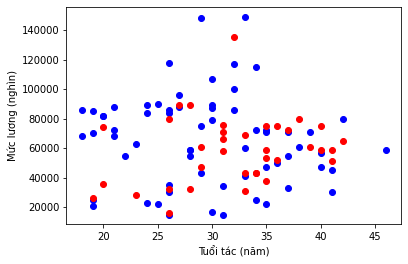

In [34]:
x1 = np.array([X_train[i] for i in range(len(y_test)) if y_predict[i] == 1])
x0 = np.array([X_train[i] for i in range(len(y_test)) if y_predict[i] == 0])

plt.xlabel('Tuổi tác (năm)')
plt.ylabel('Mức lương (nghìn)')
plt.scatter(x0[:,0],x0[:,1],c='blue')
plt.scatter(x1[:,0],x1[:,1],c='red')
plt.show()